<a href="https://colab.research.google.com/github/aprajeeta10/python-projects/blob/main/Calculate_Value_at_Risk_(VaR)_Using_the_Historical_Simulation_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries


In [19]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

##Setting Time Range and Ticker List


In this section, we set the time range for our historical data to 15 years and create a list of stock tickers for our portfolio.



In [20]:
### Set time from to a certain number of years
years = 15

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365*years)

### Create a list of tickers
tickers = ['SPY','BND','GLD','QQQ','VTI']

##Downloading Adjusted Close Prices

Next, we download the daily adjusted close prices for each stock ticker using the yfinance library and store the data in a DataFrame.

In [21]:
### Download the daily adjusted close prices for the tickers
adj_close_df = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start = startDate, end = endDate)
    adj_close_df[ticker] = data['Adj Close']

print(adj_close_df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2008-08-04   93.331261  48.957024   88.139999   38.895500   47.327229
2008-08-05   95.847679  48.756443   86.080002   40.208656   48.538994
2008-08-06   96.273300  48.691723   86.639999   40.821449   48.599224
2008-08-07   94.839630  49.002335   86.089996   40.506298   47.906773
2008-08-08   96.601891  48.982929   84.430000   41.425503   48.922867
...                ...        ...         ...         ...         ...
2023-07-24  454.200012  72.500000  181.399994  376.230011  226.320007
2023-07-25  455.440002  7

##Calculating Daily Log Returns


We calculate the daily log returns for each stock in our portfolio and drop any missing values.



In [22]:
### Calculate the daily log returns and drop any NAs
log_returns = np.log(adj_close_df/adj_close_df.shift(1))
log_returns  = log_returns.dropna()

print(log_returns)

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2008-08-05  0.026605 -0.004105 -0.023649  0.033204  0.025282
2008-08-06  0.004431 -0.001328  0.006484  0.015125  0.001240
2008-08-07 -0.015004  0.006359 -0.006368 -0.007750 -0.014351
2008-08-08  0.018411 -0.000396 -0.019470  0.022439  0.020988
2008-08-11  0.010304 -0.004236 -0.039870  0.009046  0.009950
...              ...       ...       ...       ...       ...
2023-07-24  0.004457 -0.001654 -0.004291  0.001596  0.003541
2023-07-25  0.002726 -0.001104  0.005552  0.006755  0.002515
2023-07-26  0.000154  0.003309  0.004867 -0.003332  0.000749
2023-07-27 -0.006652 -0.008570 -0.015837 -0.002387 -0.007737
2023-07-28  0.009743  0.003464  0.007950  0.018051  0.010376

[3771 rows x 5 columns]


##Creating an Equally Weighted Portfolio


Now, we’ll create an equally weighted portfolio with a total value of $1,000,000.



In [23]:
portfolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
print(weights)

[0.2 0.2 0.2 0.2 0.2]


##Calculating Historical Portfolio Returns


With the weights defined, we can now calculate the historical portfolio returns.



In [24]:
historical_returns = (log_returns * weights).sum(axis =1)
print(historical_returns)

Date
2008-08-05    0.011467
2008-08-06    0.005190
2008-08-07   -0.007423
2008-08-08    0.008394
2008-08-11   -0.002961
                ...   
2023-07-24    0.000730
2023-07-25    0.003289
2023-07-26    0.001149
2023-07-27   -0.008236
2023-07-28    0.009917
Length: 3771, dtype: float64


##Finding X-Day Historical Returns


Next, we’ll find the X-day historical returns. In this example, we’ll use a 50-day window.



In [25]:
days = 50

range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
print(range_returns)

Date
2008-10-14   -0.163327
2008-10-15   -0.232466
2008-10-16   -0.219846
2008-10-17   -0.219482
2008-10-20   -0.197475
                ...   
2023-07-24    0.059341
2023-07-25    0.063667
2023-07-26    0.067665
2023-07-27    0.056898
2023-07-28    0.072492
Length: 3722, dtype: float64


##Calculating VaR Using the Historical Method


Now, we can specify a confidence interval and calculate the Value at Risk (VaR) using the historical method.



In [26]:
confidence_interval = 0.99

VaR = -np.percentile(range_returns, 100 - (confidence_interval * 100))*portfolio_value
print(VaR)

191697.29949218314


##Plotting the Results of the Historical Returns


Finally, let’s plot the results of the historical returns to visualize the distribution of portfolio returns and the VaR at the specified confidence level.



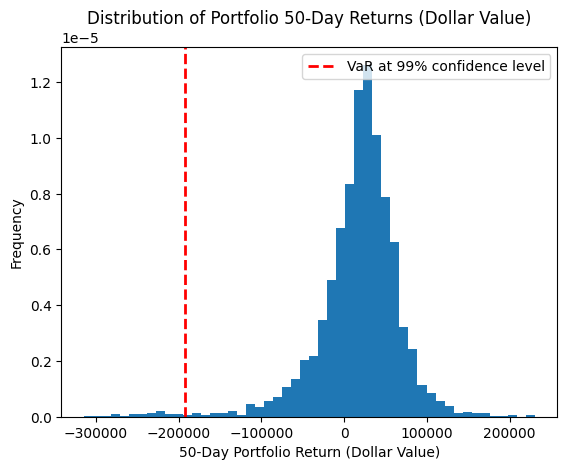

In [27]:
return_window = days
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value

plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()

CONCLUSION:

In conclusion, the historical method for calculating Value at Risk (VaR) provides a simple and intuitive way to estimate the potential losses in your investment portfolio. However, it is essential to remember that historical returns do not guarantee future performance, and relying solely on this method may lead to inaccurate risk assessments.